## Table of Contents
- [Data Load](#Data-Load)
- [Data Processing](#Data-Processing)
- [Numerical Features](#Numerical-Features)
- [- EDA](##EDA)
- [- Skewness](##Skewness)
- [- Scaling](##Scaling)
- [Catagorical Features](#Catagorical-Features)
- [- Encoding](##Encoding)
- [Outlier Treatment](#Outlier-Treatment)
- [Regression Model](#Regression-Model)

# --------------------------------------------------------
# Data Load

lets use car data.csv

In [2]:
# IMPORT ALL PACKAGES
import numpy as np 
import pandas as pd
import datetime as dt

from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
df = pd.read_csv('../src/data/car_data.csv')

# Preview the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Basic Information
# Provide a list of the DataFrame columns and the data types in each of the columns.display(df.info())
display(df.info())

# you can see there are 301 entries
# and 301 non null entries
# so there are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


None

In [5]:
# drop rows with missing values
df.dropna(inplace=True)

# Feature Descriptions
# Extract various descriptive statistics from the dataset
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


# --------------------------------------------------------
# Data Processing

#### Feature Transformation - Year

"Year" shows the car model year. We can replace this column with the cars age attribute.To calculate the age, we consider the origin time to be 1 year older than the maximum model year:

In [6]:
# Add a new feature called Age calculated from Year
year_ = dt.datetime.now().year

# Create a new column 'Age' by subtracting the 'Year' column from the current year
df_ = df.assign(Age = year_ - df['Year'])

# Drop the year column
df_.drop('Year', axis=1, inplace=True)

# move the `Age` column to the second position
df_.insert(1, 'Age', df_.pop('Age'))

print("Original Vs. New DataFrame:")
display(df.head())
display(df_.head())

print("Original DataFrame:")
display(df.describe().T)
display(df_.describe().T)

df = df_.copy()


Original Vs. New DataFrame:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


,Car_Name,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,11,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,12,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,8,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,14,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,11,4.60,6.87,42450,Diesel,Dealer,Manual,0


Original DataFrame:


,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


,count,mean,std,min,25%,50%,75%,max
Age,301.0,11.372093,2.891554,7.00,9.0,11.0,13.0,22.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


#### Feature Selection

Since Car_Name contains 98 unique categories, and this number of categories is very high compared to the number of dataset samples, it is better to drop it:

In [7]:
df.drop('Car_Name', axis=1, inplace=True)
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,11,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,12,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,8,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,14,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,11,4.60,6.87,42450,Diesel,Dealer,Manual,0


We can determine which are the numerical and categorical features:

In [8]:
output_var = 'Selling_Price'
numeric_data = df.select_dtypes(include=['number']).columns.tolist()
numeric_features = [col for col in numeric_data if col != output_var]
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'Numeric Features    : {numeric_features}')
print(f'Categorical Features: {categorical_features}')

Numeric Features    : ['Age', 'Present_Price', 'Kms_Driven', 'Owner']
Categorical Features: ['Fuel_Type', 'Seller_Type', 'Transmission']


# --------------------------------------------------------
# Numerical Features

In [9]:
print(f'Numeric Features    : {numeric_features}')
print(f'target variable       : {output_var}')

# display the numeric features and output variable
display(df[numeric_features + [output_var]].head())

Numeric Features    : ['Age', 'Present_Price', 'Kms_Driven', 'Owner']
target variable       : Selling_Price


,Age,Present_Price,Kms_Driven,Owner,Selling_Price
0,11,5.59,27000,0,3.35
1,12,9.54,43000,0,4.75
2,8,9.85,6900,0,7.25
3,14,4.15,5200,0,2.85
4,11,6.87,42450,0,4.60


## EDA

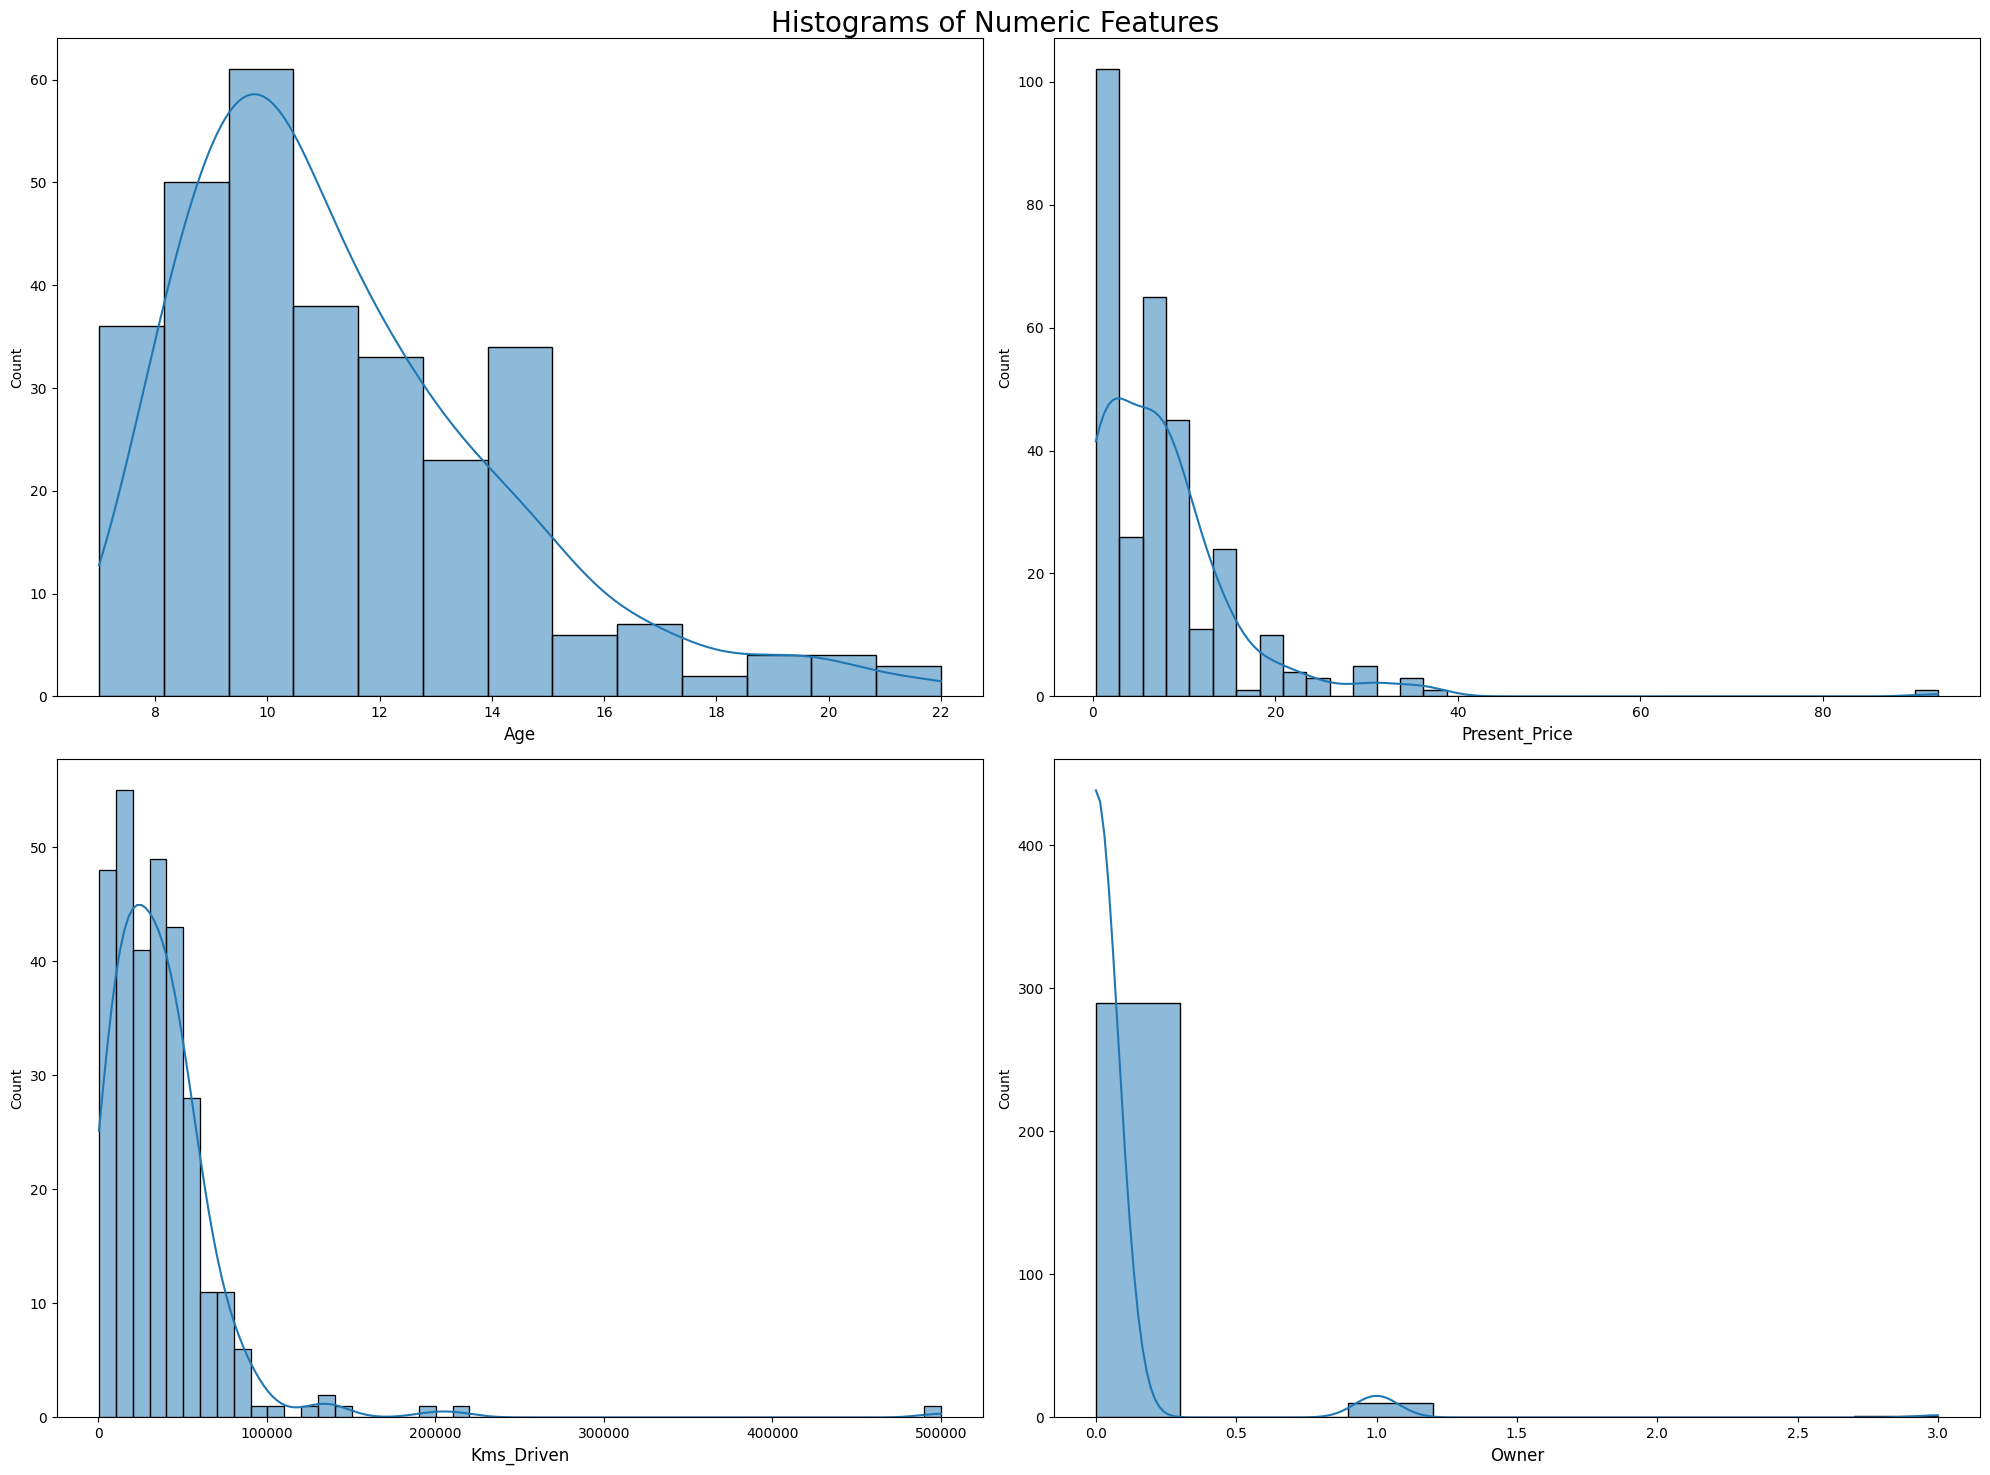

In [10]:
# Histograms of Numeric Features
plt.figure(figsize=(20, 15))
plt.suptitle('Histograms of Numeric Features', fontsize=20)

for i, col in enumerate(df[numeric_features].columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.xlabel(col, fontsize=12)
plt.tight_layout()
plt.show()

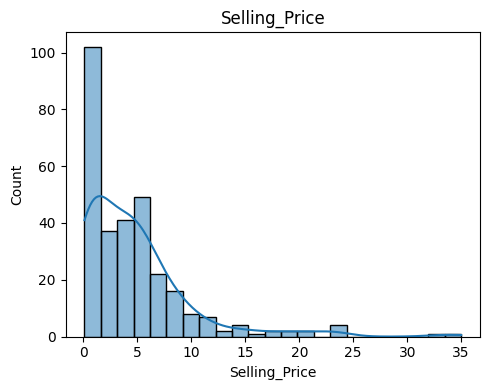

In [11]:
# plot of the target variable
plt.figure(figsize=(5, 4))
sns.histplot(df[output_var], kde=True)
plt.title(output_var)
plt.tight_layout()
plt.show()

# --------------------------------------------------------
## Skewness

Skewness Transform

In [12]:
# All the numeric data is right skewed.
# if the skew level is > 1 then it is right skewed

for col in numeric_data:
    print(f'{col} = {df[col].skew()}')

df[numeric_data].head()

Age = 1.2461891109537495
Selling_Price = 2.493422417797524
Present_Price = 4.083150156592918
Kms_Driven = 6.436012679752193
Owner = 7.616849679389442


,Age,Selling_Price,Present_Price,Kms_Driven,Owner
0,11,3.35,5.59,27000,0
1,12,4.75,9.54,43000,0
2,8,7.25,9.85,6900,0
3,14,2.85,4.15,5200,0
4,11,4.60,6.87,42450,0


Age = 0.07320690666571263
Selling_Price = 0.01653014435685836
Present_Price = -0.0069110872764610596
Kms_Driven = 0.07953227711071613
Owner = 4.9645689710476955


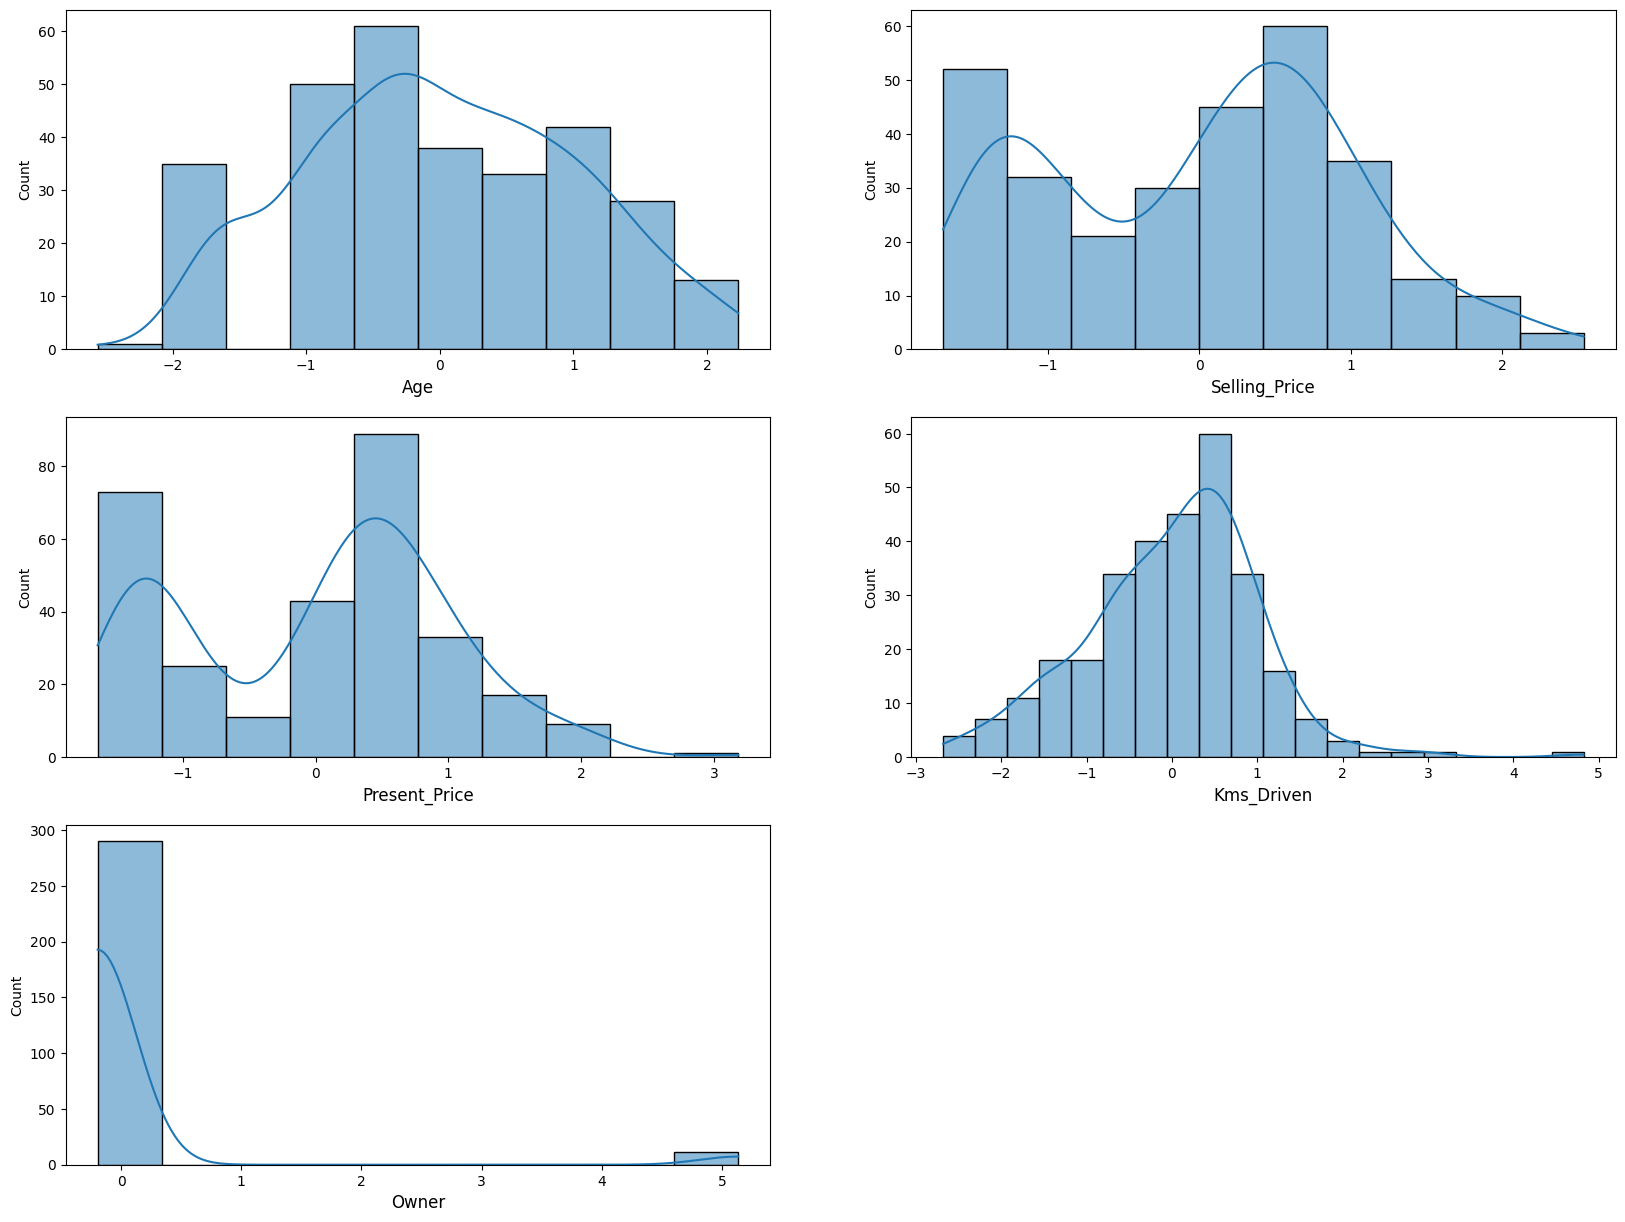

In [13]:
# owner has "0" values so we need to use a transformer that can handle "0"

# Use PowerTransformer to handle "0" values
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# create a new dataframe to store the transformed data
df_transformed = df.copy()
df_transformed[numeric_data] = pt.fit_transform(df[numeric_data])

# check the skewness of the transformed data
for col in numeric_data:
    print(f'{col} = {df_transformed[col].skew()}')

# owner is still skewed

# plot a histogram of the transformed data
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_transformed[numeric_data].columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df_transformed[col], kde=True)
    plt.xlabel(col, fontsize=12)

# --------------------------------------------------------
## Scaling

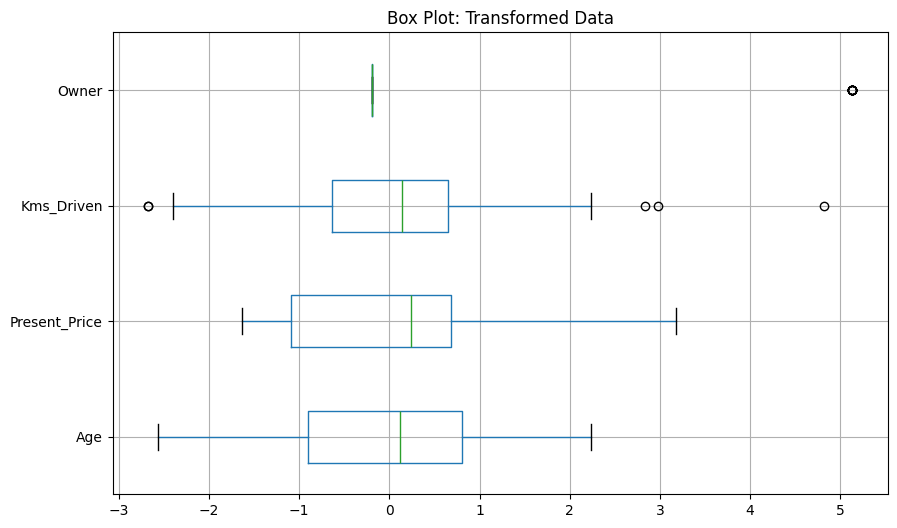

In [14]:
# box plots of the transformed data

fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df_transformed[numeric_features].boxplot(vert = False, ax=ax)  
_ = ax.set_title(f'Box Plot: Transformed Data')

In [15]:
# We want to scale the data to a range of 0 to 2
from sklearn.preprocessing import MinMaxScaler

# set up the scaler
scaler_mm = MinMaxScaler(feature_range=(0, 2))
scaler_mm.fit(df_transformed[numeric_data])

# transform the data
df_transformed[numeric_data] = scaler_mm.transform(df_transformed[numeric_data])



#--------------------------------------------------------------------------------------------
# Other scalers that can be used are:

# MinMaxScaler (Features vary widely in scale but no strong outliers)
from sklearn.preprocessing import MinMaxScaler
df_.drop
df_ = df_transformed.copy()
scaler = MinMaxScaler(feature_range=(0, 2))
scaler.fit(df_[numeric_data])
df_[numeric_data] = scaler.transform(df_[numeric_data])

# StandardScaler (Data is normally distributed or close to it)
from sklearn.preprocessing import StandardScaler
df_ = df_transformed.copy()
scaler = StandardScaler()
df_[numeric_data] = scaler.fit_transform(df_[numeric_data])

# RobustScaler (data contains many outliers)
from sklearn.preprocessing import RobustScaler
df_ = df_transformed.copy()
scaler = RobustScaler()
df_[numeric_data] = scaler.fit_transform(df_[numeric_data])

# MaxAbsScaler (Data is sparse and already centered at 0)
from sklearn.preprocessing import MaxAbsScaler
df_ = df_transformed.copy()
scaler = MaxAbsScaler()
df_[numeric_data] = scaler.fit_transform(df_[numeric_data])

# QuantileTransformer (You want to remove the effects of outliers and make data more Gaussian)
from sklearn.preprocessing import QuantileTransformer
df_ = df_transformed.copy()
scaler = QuantileTransformer(n_quantiles=300 ,output_distribution='normal')  # 'normal' or 'uniform', n_quantiles is the number of entries
df_[numeric_data] = scaler.fit_transform(df_[numeric_data])

# PowerTransformer (Data is not normally distributed and has variance issues)
from sklearn.preprocessing import PowerTransformer
df_ = df_transformed.copy()
scaler = PowerTransformer(method='yeo-johnson')  # 'yeo-johnson' or 'box-cox' for positive data only
df_[numeric_data] = scaler.fit_transform(df_[numeric_data])



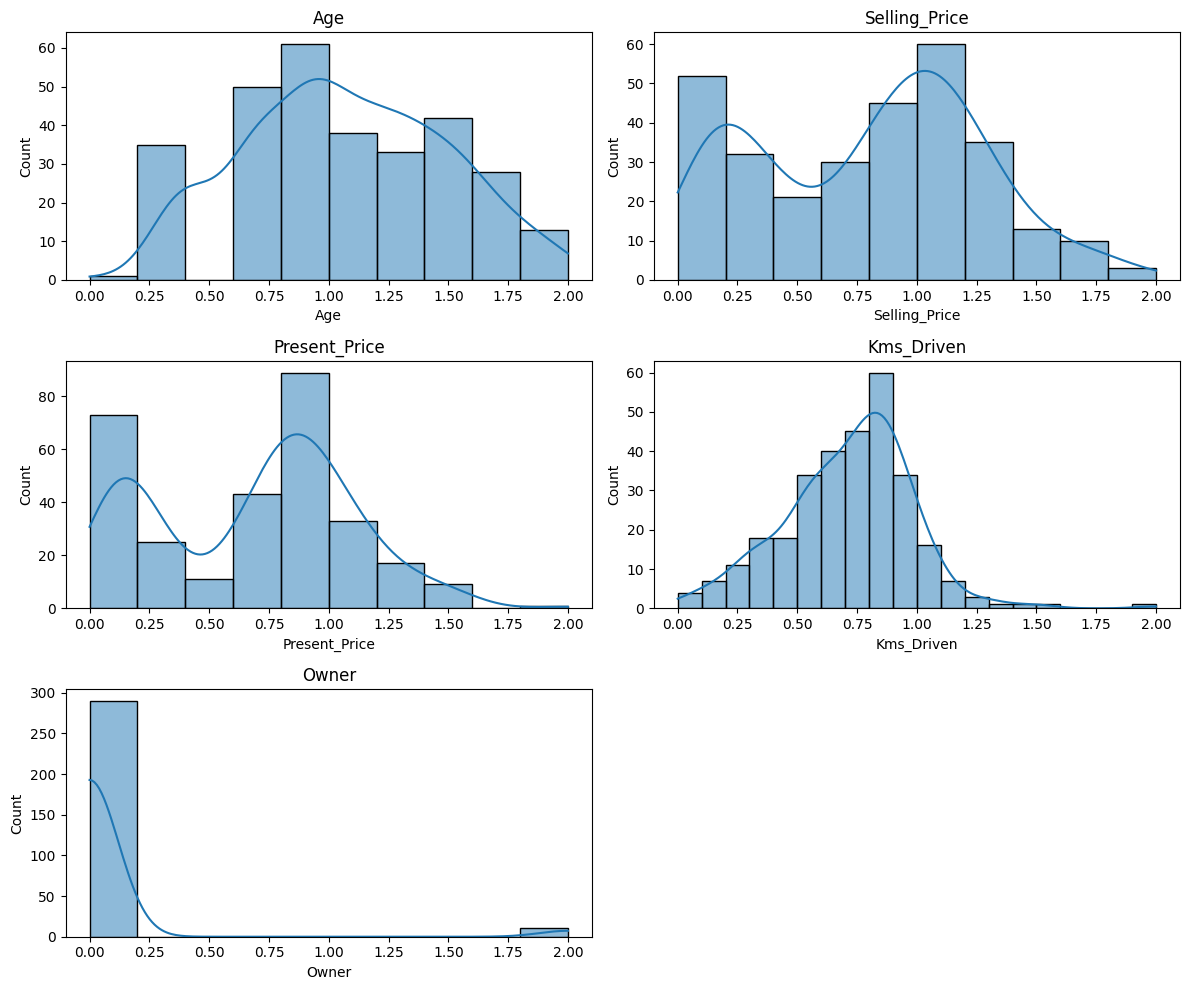

In [16]:
# Histogram of the transformed data
plt.figure(figsize=(12, 10))
for i, col in enumerate(df_transformed[numeric_data].columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df_transformed[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# Catagorical Features
## Encoding

In [17]:
print(f'Categorical Features: {categorical_features}')

# display the catagorical features
display(df[categorical_features].head())

for col in categorical_features:
    print(f"{col}: {df[col].unique().tolist()}")


Categorical Features: ['Fuel_Type', 'Seller_Type', 'Transmission']


,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


Fuel_Type: ['Petrol', 'Diesel', 'CNG']
Seller_Type: ['Dealer', 'Individual']
Transmission: ['Manual', 'Automatic']


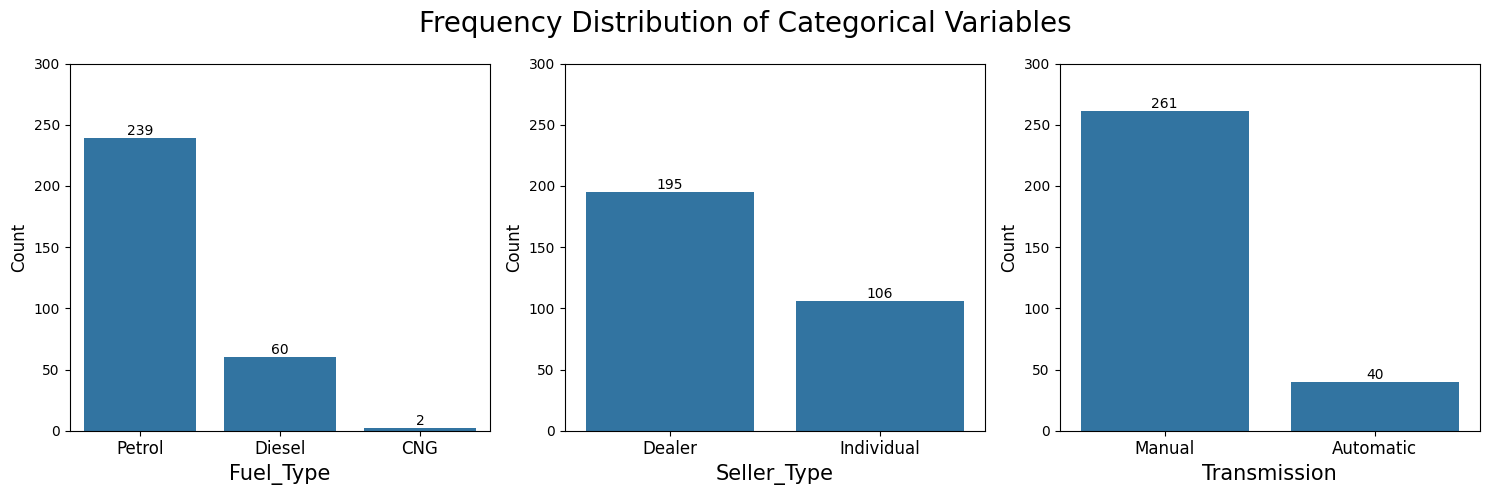

In [18]:
# Frequency of each category in the categorical features
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
       
for i in range(len(categorical_features)):
    graph = sns.countplot(x=categorical_features[i], data=df_transformed, ax=ax[i])
    ax[i].set_xlabel(categorical_features[i], fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0,300])
    ax[i].tick_params(axis='x', labelsize=12)
    for cont in graph.containers:
        graph.bar_label(cont)

plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20) 
plt.tight_layout()
plt.show()

Nominal Features so use one hot encoding (dummy encoding)

** DO NOT SCALE THE ENCODED FEATURES **

In [19]:
# one hot encoding of the categorical features
df_transformed = pd.get_dummies(df_transformed, columns=categorical_features, drop_first=True)

# Convert all boolean columns to integers (1/0)
df_transformed = df_transformed.astype({
    col: int for col in df_transformed.select_dtypes(include='bool').columns
})

In [20]:
# check the new columns
df_transformed.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1.117662,0.847112,0.728084,0.701586,0.0,0,1,0,1
1,1.273454,1.009288,0.946691,0.845480,0.0,1,0,0,1
2,0.391361,1.214467,0.960274,0.371942,0.0,0,1,0,1
3,1.512453,0.775139,0.614405,0.317768,0.0,0,1,0,1
4,1.117662,0.994060,0.810390,0.841246,0.0,1,0,0,1


In [21]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     301 non-null    float64
 1   Selling_Price           301 non-null    float64
 2   Present_Price           301 non-null    float64
 3   Kms_Driven              301 non-null    float64
 4   Owner                   301 non-null    float64
 5   Fuel_Type_Diesel        301 non-null    int64  
 6   Fuel_Type_Petrol        301 non-null    int64  
 7   Seller_Type_Individual  301 non-null    int64  
 8   Transmission_Manual     301 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 21.3 KB


# --------------------------------------------------------
# Outlier Treatment

after skewness, scaling and encoding, we can do outlier treatment.

it can also be used on ordinal data (like small, medium, large) after encoding, you see they are in a meaningful order

In [22]:
# use Isolation Forest (Handles High Dimensional Data)
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df_transformed[numeric_data])
df_iso = df_transformed[outliers == 1] # Always keep == 1 to remove outliers
display(df_iso.info())



<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     298 non-null    float64
 1   Selling_Price           298 non-null    float64
 2   Present_Price           298 non-null    float64
 3   Kms_Driven              298 non-null    float64
 4   Owner                   298 non-null    float64
 5   Fuel_Type_Diesel        298 non-null    int64  
 6   Fuel_Type_Petrol        298 non-null    int64  
 7   Seller_Type_Individual  298 non-null    int64  
 8   Transmission_Manual     298 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 23.3 KB


None

Other treatments include:

In [23]:
# Use Z-Score (features are normally distributed and quick to interpret) (univariate)
from scipy.stats import zscore

# Apply z-score
z_scores = df_transformed.apply(zscore)

# Remove rows with any feature beyond ±3 std dev
df_zs = df_transformed[(abs(z_scores) < 3).all(axis=1)]
display(df_zs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     288 non-null    float64
 1   Selling_Price           288 non-null    float64
 2   Present_Price           288 non-null    float64
 3   Kms_Driven              288 non-null    float64
 4   Owner                   288 non-null    float64
 5   Fuel_Type_Diesel        288 non-null    int64  
 6   Fuel_Type_Petrol        288 non-null    int64  
 7   Seller_Type_Individual  288 non-null    int64  
 8   Transmission_Manual     288 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 22.5 KB


None

In [24]:
# Use IQR method (when data is skewed, non-normal or small sample size) (univariate)
Q1 = df_transformed.quantile(0.25)
Q3 = df_transformed.quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
mask = ~((df_transformed < (Q1 - 1.5 * IQR)) | (df_transformed > (Q3 + 1.5 * IQR))).any(axis=1)
df_iqr = df_transformed[mask]
display(df_iqr.info())


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     200 non-null    float64
 1   Selling_Price           200 non-null    float64
 2   Present_Price           200 non-null    float64
 3   Kms_Driven              200 non-null    float64
 4   Owner                   200 non-null    float64
 5   Fuel_Type_Diesel        200 non-null    int64  
 6   Fuel_Type_Petrol        200 non-null    int64  
 7   Seller_Type_Individual  200 non-null    int64  
 8   Transmission_Manual     200 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 15.6 KB


None

In [25]:
# Use local outlier factor (LOF) (handles anomolies, clustered data, based on local density) (multivariate)
from sklearn.neighbors import LocalOutlierFactor


lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outliers = lof.fit_predict(df_transformed)

df_lof = df_transformed[outliers == 1]
display(df_lof.info())

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     298 non-null    float64
 1   Selling_Price           298 non-null    float64
 2   Present_Price           298 non-null    float64
 3   Kms_Driven              298 non-null    float64
 4   Owner                   298 non-null    float64
 5   Fuel_Type_Diesel        298 non-null    int64  
 6   Fuel_Type_Petrol        298 non-null    int64  
 7   Seller_Type_Individual  298 non-null    int64  
 8   Transmission_Manual     298 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 23.3 KB


None

In [26]:
# Use DBSCAN (outliers are low-density points in the data) (multivariate)
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_transformed)

# -1 are outliers
df_dbscan = df_transformed[clusters != -1]
display(df_dbscan.info())

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     278 non-null    float64
 1   Selling_Price           278 non-null    float64
 2   Present_Price           278 non-null    float64
 3   Kms_Driven              278 non-null    float64
 4   Owner                   278 non-null    float64
 5   Fuel_Type_Diesel        278 non-null    int64  
 6   Fuel_Type_Petrol        278 non-null    int64  
 7   Seller_Type_Individual  278 non-null    int64  
 8   Transmission_Manual     278 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 21.7 KB


None

In [27]:
# Elliptic Envelope (data is ellipltically distributed, Gaussian) (multivariate)
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination=0.01, random_state=42)
ee.fit(df_transformed)
outliers = ee.predict(df_transformed)

df_ee = df_transformed[outliers == 1]
display(df_ee.info())

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     298 non-null    float64
 1   Selling_Price           298 non-null    float64
 2   Present_Price           298 non-null    float64
 3   Kms_Driven              298 non-null    float64
 4   Owner                   298 non-null    float64
 5   Fuel_Type_Diesel        298 non-null    int64  
 6   Fuel_Type_Petrol        298 non-null    int64  
 7   Seller_Type_Individual  298 non-null    int64  
 8   Transmission_Manual     298 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 23.3 KB


None

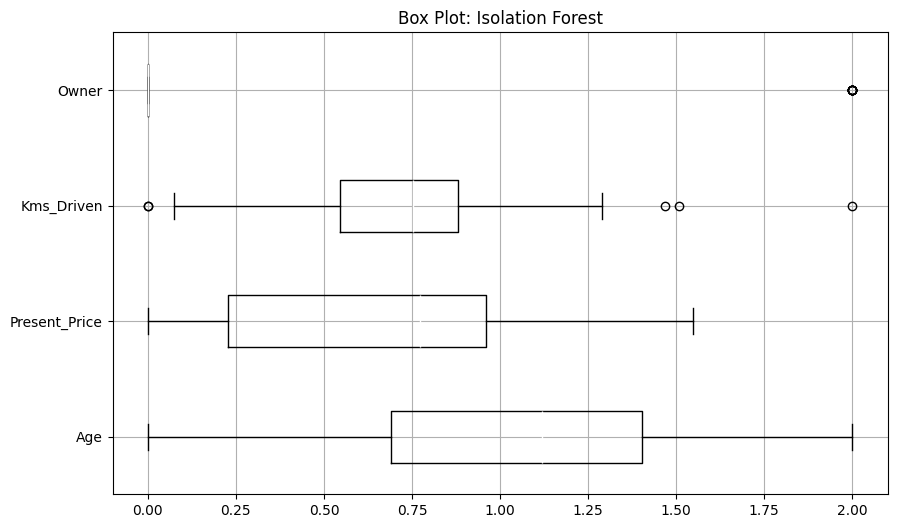

In [28]:
# box plot of df_iso

fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df_iso[numeric_features].boxplot(vert = False, ax=ax)
plot = ax.set_title(f'Box Plot: Isolation Forest')

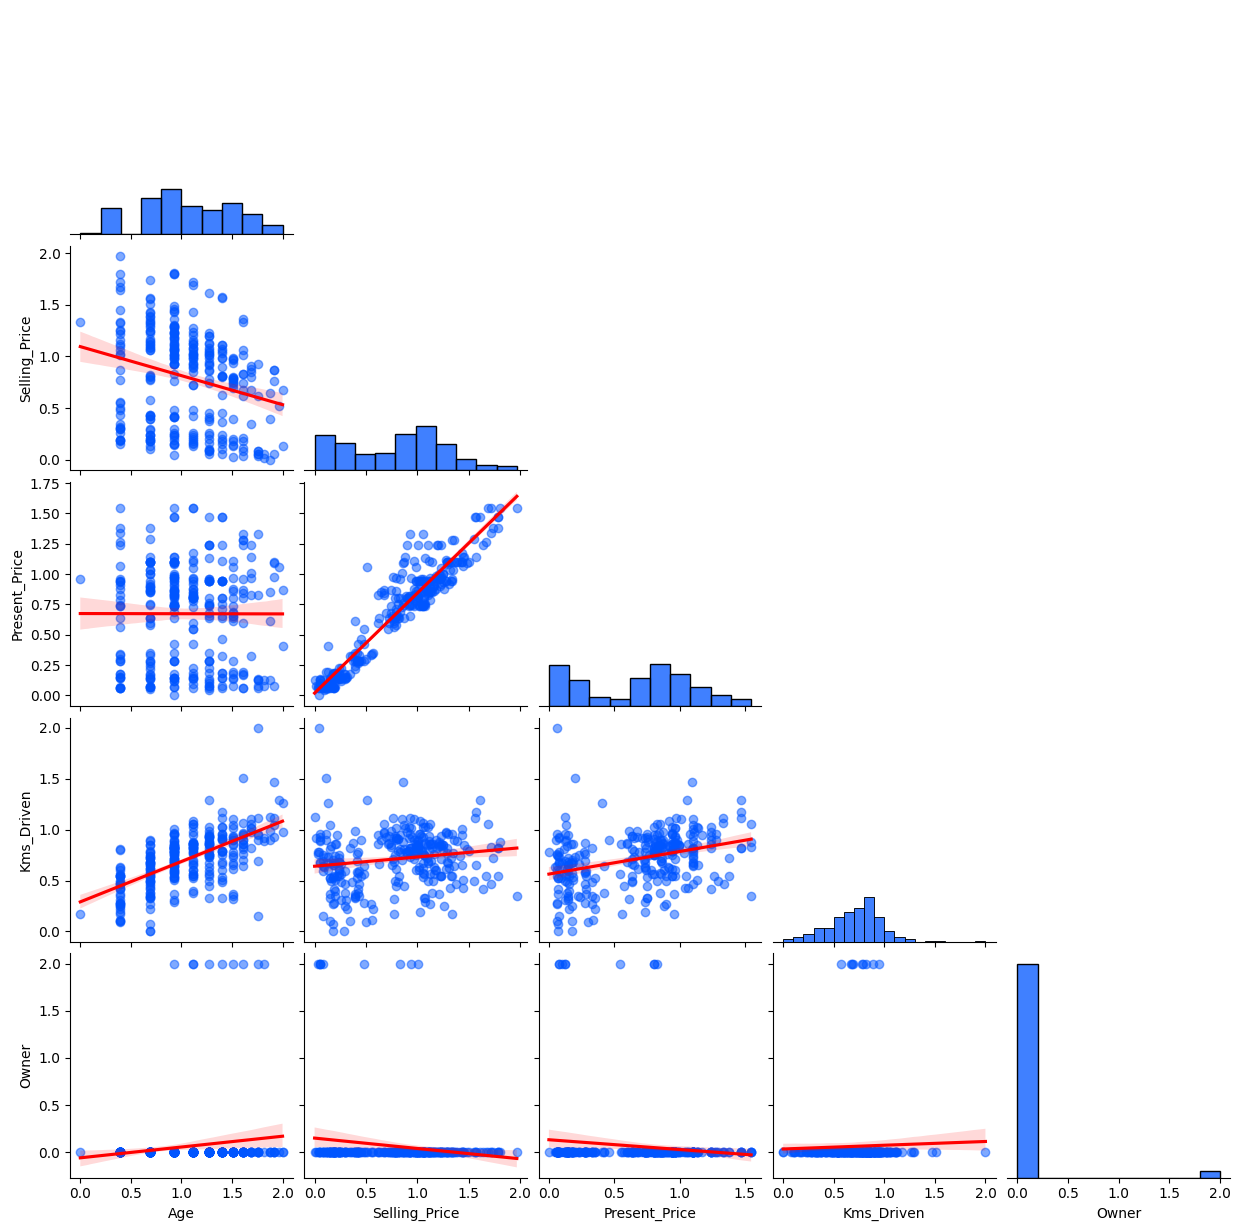

In [29]:
# scatter plots of data
plot = sns.pairplot(data = df_iso[numeric_data],
                    corner=True,
                    kind='reg',
                    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.5}},)

In [30]:
# display correlation matrix
display(df_iso.corr())

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Age,1.000000,-0.247956,-0.001499,0.623490,0.139142,-0.035576,0.028928,-0.006868,0.050536
Selling_Price,-0.247956,1.000000,0.947904,0.161331,-0.150845,0.514757,-0.508979,-0.835088,-0.234997
Present_Price,-0.001499,0.947904,1.000000,0.342789,-0.123692,0.479041,-0.477263,-0.858005,-0.245090
Kms_Driven,0.623490,0.161331,0.342789,1.000000,0.030744,0.266458,-0.271191,-0.306475,-0.045273
Owner,0.139142,-0.150845,-0.123692,0.030744,1.000000,-0.038473,0.040932,0.116114,0.068479
Fuel_Type_Diesel,-0.035576,0.514757,0.479041,0.266458,-0.038473,1.000000,-0.979346,-0.348845,-0.106832
Fuel_Type_Petrol,0.028928,-0.508979,-0.477263,-0.271191,0.040932,-0.979346,1.000000,0.356792,0.099054
Seller_Type_Individual,-0.006868,-0.835088,-0.858005,-0.306475,0.116114,-0.348845,0.356792,1.000000,0.077933
Transmission_Manual,0.050536,-0.234997,-0.245090,-0.045273,0.068479,-0.106832,0.099054,0.077933,1.000000


In [31]:
# calculate the correlation matrix
def correlation_matrix(df, dropduplicates=True, figsize=(20, 15)):
    df = np.abs(df.corr())
    # exclude duplicate values by masking the upper triangle of the matrix
    if dropduplicates:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
    
    # set matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # add color map
    cmap = sns.diverging_palette(230, 10, as_cmap=True)

    # draw heatmaps based on !/duplicates
    if dropduplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})
    else:
        sns.heatmap(df, cmap=cmap, vmax=.3, center=0, annot=True,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})

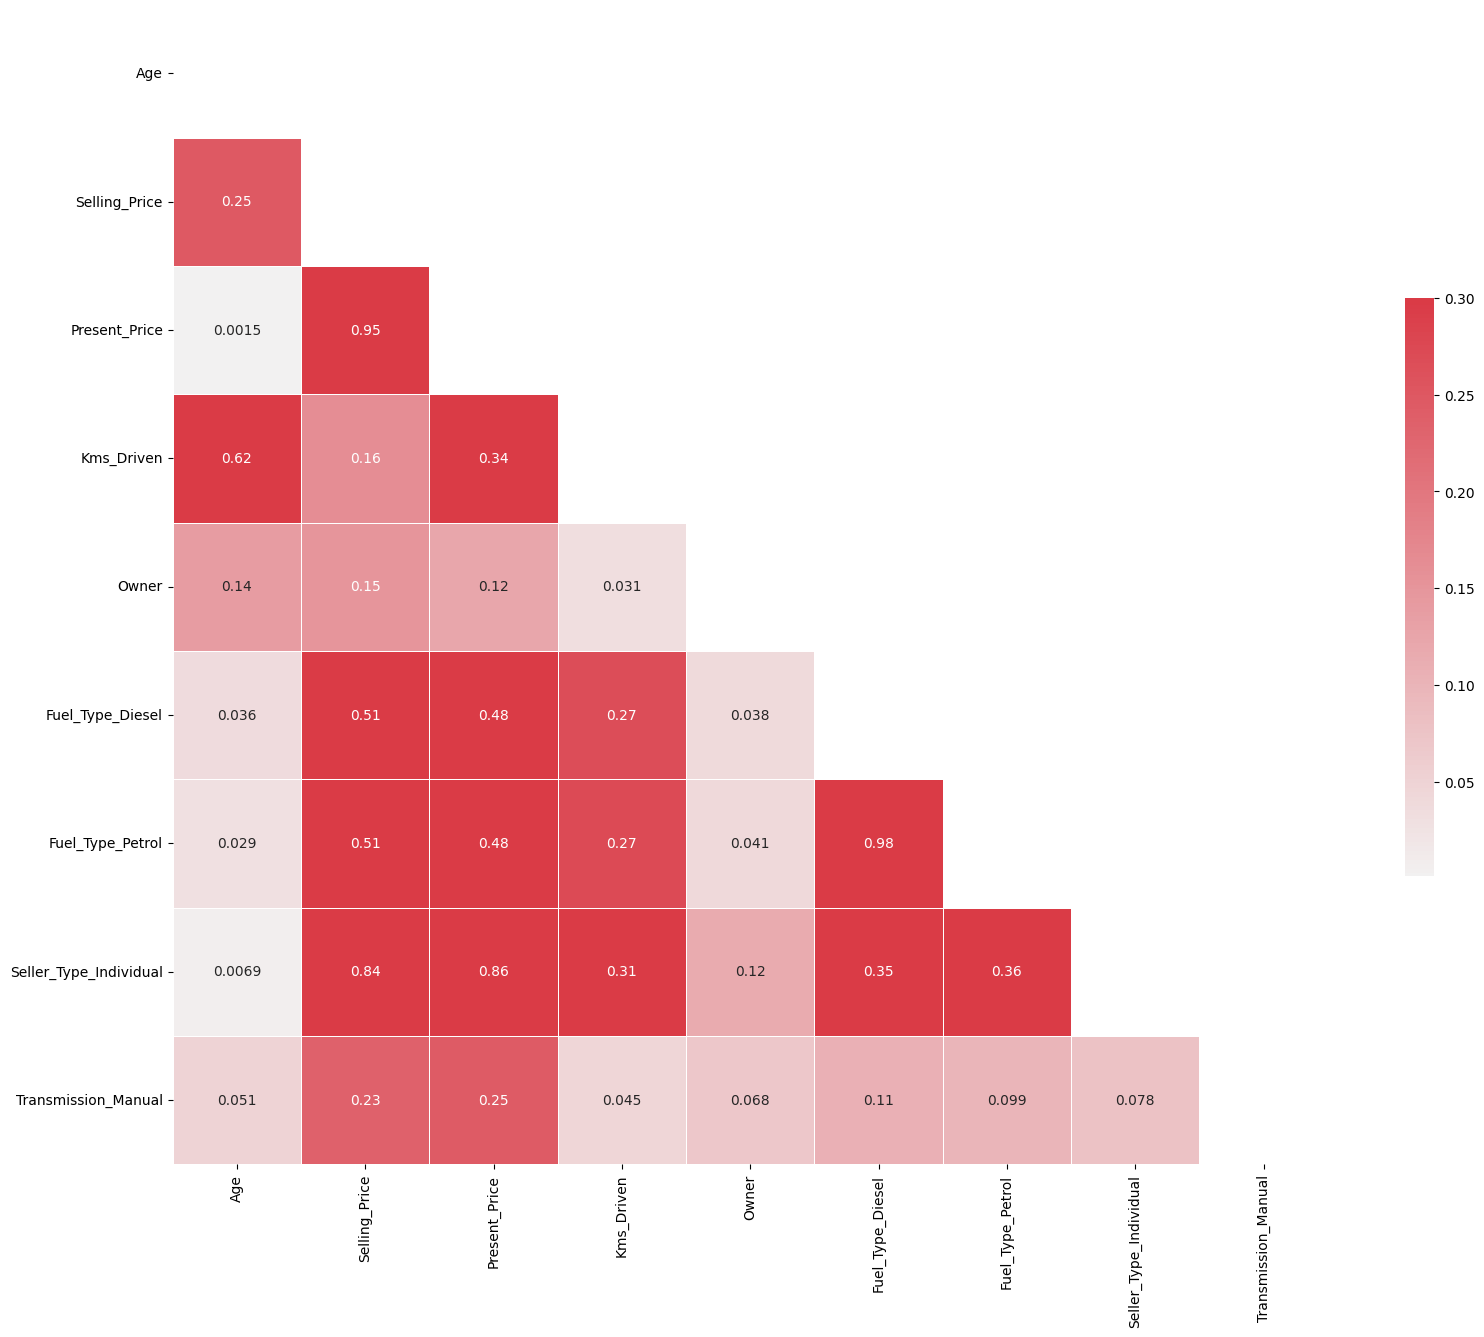

In [32]:
# run correlation matrix function
correlation_matrix(df_iso)

In [33]:
# since owner has low correlation, we drop it
df_iso.drop('Owner', axis=1, inplace=True)
df_cleaned = df_iso.copy()
# check the cleaned data
df_cleaned.head()

C:\Users\edcul\AppData\Local\Temp\ipykernel_30676\4064787711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iso.drop('Owner', axis=1, inplace=True)


,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1.117662,0.847112,0.728084,0.701586,0,1,0,1
1,1.273454,1.009288,0.946691,0.845480,1,0,0,1
2,0.391361,1.214467,0.960274,0.371942,0,1,0,1
3,1.512453,0.775139,0.614405,0.317768,0,1,0,1
4,1.117662,0.994060,0.810390,0.841246,1,0,0,1


# --------------------------------------------------------
# Regression Model

our data is cleaned, we can now train a model from it

Extract features & define input and output 

In [34]:
# Set the output variable to selling_price  
output_var = 'Selling_Price'
# Set the features to be used for training
features = df_cleaned.columns.drop(output_var).tolist()
# Set the target variable
x = df_cleaned[features]
y = df_cleaned[output_var]
# Check the features and target variable
print(f'Features: {features}')

Features: ['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']


In [35]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)

In [36]:
# Train the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [37]:
# Perform prediction using linear regression
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

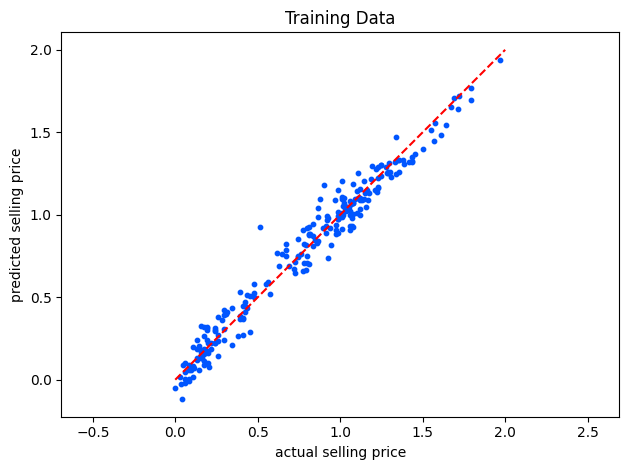

In [38]:
# Model Evaluation
plt.scatter(y_train, y_train_pred, s=10)
plt.plot([0, 2], [0, 2], color='red', linestyle='dashed')

plt.xlabel('actual selling price')
plt.ylabel('predicted selling price')
plt.axis('equal')
plt.title('Training Data')
plt.tight_layout()

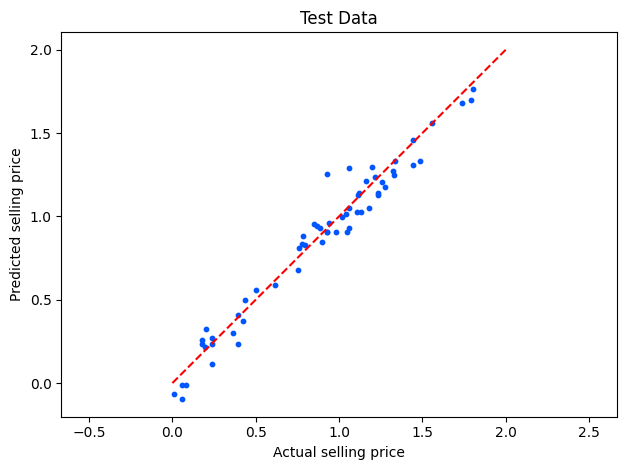

In [39]:
plt.scatter(y_test, y_test_pred, s=10)
plt.plot([0, 2], [0,2], color = 'red', linestyle='dashed')
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')
plt.axis('equal')
plt.title('Test Data')
plt.tight_layout()

#### Calculating the metrics:

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the MAE, MSE and RMSE for the training data
train_mae =  np.round(mean_absolute_error(y_train, y_train_pred),3 )
train_mse =  np.round(mean_squared_error(y_train, y_train_pred),3)
train_rmse = np.round(np.sqrt(train_mse),3)

print('COMPARISON OF METRICS - TRAINING DATA')
print(f'Training MAE   : {train_mae}')
print(f'Training MSE   : {train_mse}')
print(f'Training RMSE  : {train_rmse}')

test_mae =  np.round(mean_absolute_error(y_test, y_test_pred),3) 
test_mse =  np.round(mean_squared_error(y_test, y_test_pred),3)
test_rmse = np.round(np.sqrt(test_mse),3)

print('COMPARISON OF METRICS - TEST DATA')
print(f'Testing MAE   : {test_mae}')
print(f'Testing MSE   : {test_mse}')
print(f'Testing RMSE  : {test_rmse}')

COMPARISON OF METRICS - TRAINING DATA
Training MAE   : 0.065
Training MSE   : 0.007
Training RMSE  : 0.084
COMPARISON OF METRICS - TEST DATA
Testing MAE   : 0.073
Testing MSE   : 0.009
Testing RMSE  : 0.095
